# **Problem Statement**

*BrightPath Academy requires a system that identifies delayed at-risk students early, provides actionable insights on using students' existing data and evaluates the impact of extracurricular activies on academic performance.*

# Hypothesis

**Challenge**: Identification of At-Risk Students
    Students with low study time and high absencies are likely to fall under lower grade classes.

**Challenge**: Targeted Support Strategies
    Students recieving tutoring will perform better than those who do not.

**Challenge**: Impact of Extracurricular Activities
    Students who participate in extracurricular activities are more likely to perform well in academics.

**Challange**: Parental Involvement
    Students with high levels of parental support are likely to perform better than those with lower levels of parental support in academics.

# Initial Checks

***Data Loading and Dataset Overview***

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import os
import warnings

os.environ["OMP_NUM_THREADS"] = "1"
warnings.filterwarnings("ignore")

df = pd.read_csv("Student_performance_data .csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [12]:
df.tail()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0
2391,3392,16,1,0,2,17.819907,13,0,2,0,0,0,1,2.140014,1.0


In [3]:
df.shape

(2392, 15)

***Data Type and Non-null COunts***

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


***Statistics Summary for Numerical Columns***

In [9]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


***Missing Value Checks***

In [15]:
df.isnull()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2388,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2389,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2390,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

***Unique Values***

In [18]:
for col in ['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport', 
            'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']:
    print(f"{col}: {df[col].unique()}")

Gender: [1 0]
Ethnicity: [0 2 1 3]
ParentalEducation: [2 1 3 4 0]
ParentalSupport: [2 1 3 4 0]
Tutoring: [1 0]
Extracurricular: [0 1]
Sports: [0 1]
Music: [1 0]
Volunteering: [0 1]
GradeClass: [2. 1. 4. 3. 0.]


**Univariate Analysis**

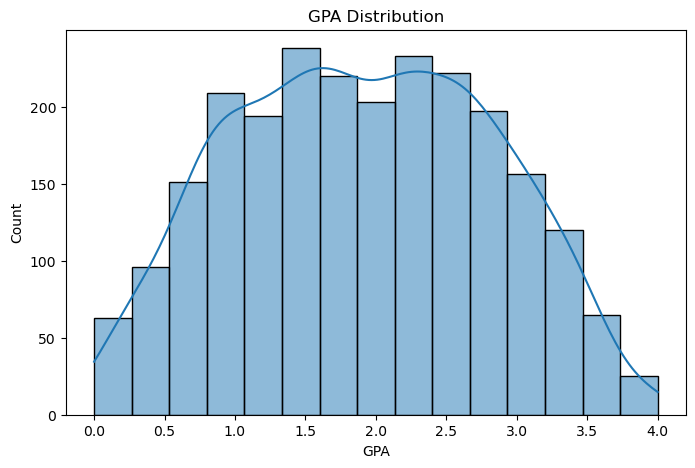

In [4]:
#GPA distribution
plt.figure(figsize=(8,5))
sns.histplot(df['GPA'], bins=15, kde=True)
plt.title('GPA Distribution')
plt.xlabel('GPA')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Study Time (Weekly) Distribution')

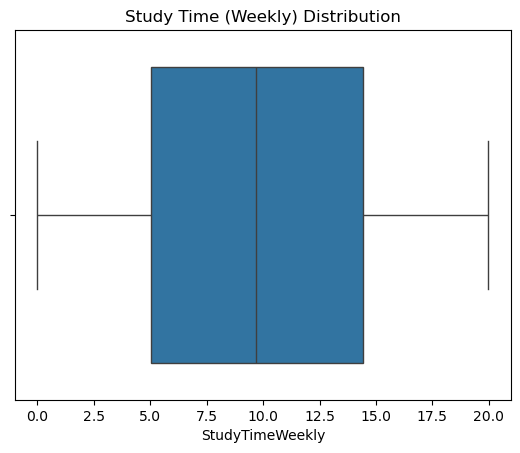

In [5]:
#Study Time Weekly distribution
sns.boxplot(x=df['StudyTimeWeekly'])
plt.title('Study Time (Weekly) Distribution')

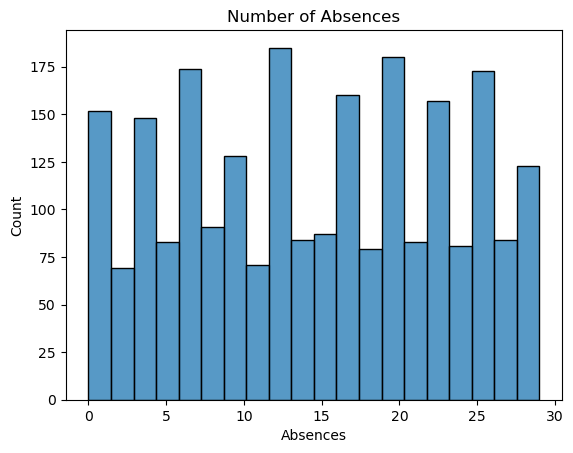

In [6]:
#Absences
sns.histplot(df['Absences'], bins=20)
plt.title("Number of Absences")
plt.xlabel("Absences")
plt.ylabel("Count")
plt.show()